In [1]:
import pandas as pd


**Análisis de las tablas csv con las que contamos**

In [2]:
items = pd.read_csv('/content/items000 (1).csv')

Index(['sku', 'product_name', 'category', 'brand', 'active', 'price'], dtype='object')

**Hay 836491 items totales**

In [6]:
items = items.rename(columns={'sku': 'ITEM_ID', 'product_name':'ITEM_NAME','category':'CATEGORY_L1', 'brand':'ITEM_BRAND', 'active': 'ITEM_STATUS', 'price':'PRICE'})

**Se observa una gran cantidad de items con columnas nulas**

In [11]:
items.to_csv('items_poc.csv')

In [ ]:
items_with_product_name = items.dropna(subset=['product_name'])


In [ ]:
items_with_product_name

,sku,product_name,category,brand,active,color,season,line
8,00-5-000F34163-05.5-P,Zapatillas Adidas Originals Superstar,NaN,Adidas,0,NaN,NaN,NaN
9,00-2-000DN6715-02.0-P,Short Adidas Afa Home 2019,NaN,Adidas,0,NaN,NaN,NaN
10,00-1-000CQ1855-10.0-P,Zapatillas Adidas Approach,NaN,Adidas,0,NaN,NaN,NaN
11,01-2-000162616-04.0-P,Remera Topper BÃ¡sica Ii,NaN,Topper,0,NaN,NaN,NaN
12,02-2-910830010-01.0-P,M Nk Brthe Tailwind Top Ls Gx Black,NaN,Nike,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
836457,FJ9361,Mochila Adidas Classic,Mochilas,Adidas,0,Azul,NaN,Mochilas
836459,163770,Short Topper Line Boys Ii,NaN,Topper,0,NaN,NaN,NaN
836460,B007A102K0138,Zapatillas Addnice Classic Nilo Kids,NaN,Addnice,0,NaN,NaN,NaN
836465,26099,Zapatillas Topper Rep,NaN,Topper,0,NaN,NaN,NaN


In [ ]:
active_items = items[items['active']==1]

**Tenemos 2800 items activos**

In [ ]:
active_items

,sku,product_name,category,brand,active,color,season,line
34082,12120,NaN,NaN,NaN,1,NaN,NaN,NaN
61516,851740/03,NaN,NaN,Puma,1,NaN,NaN,NaN
61517,K231149MW-K843,NaN,NaN,Kappa,1,NaN,NaN,NaN
61606,C-10998-6N4,NaN,NaN,Crocs,1,NaN,NaN,NaN
61686,53118,NaN,NaN,La Gear,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
836331,CD0299-433,NaN,NaN,Nike,1,NaN,NaN,NaN
836359,MULTIEU1,NaN,NaN,NaN,1,NaN,NaN,NaN
836360,MULTIUS8,NaN,NaN,NaN,1,NaN,NaN,NaN
836393,733SPM1002-001,NaN,NaN,NaN,1,NaN,NaN,NaN


**De los items activos quedan muy pocos que tengan todos los atributos**

In [ ]:
active_items.dropna()

,sku,product_name,category,brand,active,color,season,line
61932,DY6395,Malla Adidas Allover Printed,Trajes De Baño,Adidas,1,Azul,Otoño/Invierno,Trajes de baño
61933,52425,Zapatillas Topper Huayra,Zapatillas,Topper,1,Azul,Verano,Zapatillas
61936,A9TRAASO07CD,Botas Addnice Urban Sonic,Zapatillas,Addnice,1,Negro,Otoño,Zapatillas
62059,44817,Zapatillas Topper T.350,Zapatillas,Topper,1,Gris,Invierno,Zapatillas
131417,WKOZELS2,Zapatillas New Balance Koze,Zapatillas,New Balance,1,Gris,Verano,Zapatillas
131449,EE7494,Zapatillas Adidas Advantage,Zapatillas,Adidas,1,Blanco,Primavera/Verano,Zapatillas
131478,29737,Zapatillas Topper Fast,Zapatillas,Topper,1,Azul,Verano,Zapatillas
200941,A9D1AACC13E9,Zapatillas Addnice Baby Smash Nairobi,Zapatillas,Addnice,1,Azul,Otoño,Zapatillas
270501,1072A012-104,Zapatillas Asics Upcourt 3,Zapatillas,Asics,1,Blanco,Invierno,Zapatillas
276001,36942302,Ojotas Puma Popcat Flower Power,Ojotas,Puma,1,Fucsia,Primavera,Ojotas


**Y del total de items, tomando activos e inactivos hay solo 880 items con atributos completos**

In [ ]:
items.dropna()

,sku,product_name,category,brand,active,color,season,line
61426,MKOZELB2,Zapatillas New Balance Koze,Zapatillas,New Balance,0,Negro,Verano,Zapatillas
61932,DY6395,Malla Adidas Allover Printed,Trajes De Baño,Adidas,1,Azul,Otoño/Invierno,Trajes de baño
61933,52425,Zapatillas Topper Huayra,Zapatillas,Topper,1,Azul,Verano,Zapatillas
61936,A9TRAASO07CD,Botas Addnice Urban Sonic,Zapatillas,Addnice,1,Negro,Otoño,Zapatillas
62059,44817,Zapatillas Topper T.350,Zapatillas,Topper,1,Gris,Invierno,Zapatillas
...,...,...,...,...,...,...,...,...
836261,4142616-994,Ojotas Havaianas Slide Brasil,Ojotas,Havaianas,0,Lavanda,Verano,Ojotas
836265,59046,Zapatillas Topper Leon Ii Kids,Zapatillas,Topper,0,Blanco,Verano,Zapatillas
836270,6045321591,Ojotas Rider Strike Plus,Ojotas,Rider,0,Azul,Verano,Ojotas
836280,81459,Zapatillas Topper Roma Kids,Zapatillas,Topper,0,Lila,Invierno,Zapatillas


In [10]:
items['ITEM_NAME'].isna().sum()

0

In [76]:
interactions = pd.read_csv('/content/interactions000 (1).csv')

In [77]:
interactions = interactions[['customer_id', 'sku', 'created_at']]

In [78]:
interactions['EVENT_TYPE'] = 'watch'

In [79]:
interactions = interactions.rename(columns={'customer_id':'USER_ID', 'sku':'ITEM_ID'})

In [80]:
interactions['created_at']

0         2019-05-10 19:19:07
1         2019-05-10 19:21:15
2         2019-05-15 14:42:17
3         2019-05-15 14:42:17
4         2019-05-15 15:11:34
                 ...         
643263    2022-06-03 14:55:04
643264    2022-06-03 14:55:20
643265    2022-06-03 14:55:32
643266    2022-06-03 14:56:35
643267    2022-06-03 14:56:37
Name: created_at, Length: 643268, dtype: object

In [36]:
import numpy as np

In [81]:
interactions['datetime'] = interactions['created_at'].astype('datetime64[ns]')

In [82]:
interactions

,USER_ID,ITEM_ID,created_at,EVENT_TYPE,datetime
0,34048923,TEL4313PHI,2019-05-10 19:19:07,watch,2019-05-10 19:19:07
1,34048923,TEL4313PHI,2019-05-10 19:21:15,watch,2019-05-10 19:21:15
2,36392627,AIR3504PLO,2019-05-15 14:42:17,watch,2019-05-15 14:42:17
3,36392627,AIR3202PLO,2019-05-15 14:42:17,watch,2019-05-15 14:42:17
4,39214553,NOT1112NOB,2019-05-15 15:11:34,watch,2019-05-15 15:11:34
...,...,...,...,...,...
643263,77894661,MKT0047RBJ,2022-06-03 14:55:04,watch,2022-06-03 14:55:04
643264,94966202,TEL4368PHI,2022-06-03 14:55:20,watch,2022-06-03 14:55:20
643265,115503852,COC1957DOM,2022-06-03 14:55:32,watch,2022-06-03 14:55:32
643266,115503852,COC5557PHI,2022-06-03 14:56:35,watch,2022-06-03 14:56:35


In [83]:
interactions


,USER_ID,ITEM_ID,created_at,EVENT_TYPE,datetime
0,34048923,TEL4313PHI,2019-05-10 19:19:07,watch,2019-05-10 19:19:07
1,34048923,TEL4313PHI,2019-05-10 19:21:15,watch,2019-05-10 19:21:15
2,36392627,AIR3504PLO,2019-05-15 14:42:17,watch,2019-05-15 14:42:17
3,36392627,AIR3202PLO,2019-05-15 14:42:17,watch,2019-05-15 14:42:17
4,39214553,NOT1112NOB,2019-05-15 15:11:34,watch,2019-05-15 15:11:34
...,...,...,...,...,...
643263,77894661,MKT0047RBJ,2022-06-03 14:55:04,watch,2022-06-03 14:55:04
643264,94966202,TEL4368PHI,2022-06-03 14:55:20,watch,2022-06-03 14:55:20
643265,115503852,COC1957DOM,2022-06-03 14:55:32,watch,2022-06-03 14:55:32
643266,115503852,COC5557PHI,2022-06-03 14:56:35,watch,2022-06-03 14:56:35


In [84]:
interactions['TIMESTAMP'] = interactions['datetime'].values.astype(np.int64) // 10 ** 9

In [85]:
interactions.columns

Index(['USER_ID', 'ITEM_ID', 'created_at', 'EVENT_TYPE', 'datetime',
       'TIMESTAMP'],
      dtype='object')

In [86]:
interactions = interactions[['USER_ID', 'ITEM_ID', 'EVENT_TYPE', 'TIMESTAMP']]

In [87]:
interactions.to_csv('interactions_poc_8_6.csv')

# **Análisis de la Tabla de Compras**


In [73]:
purchased_items = pd.read_csv('/content/purchased_items000 (1).csv')

In [88]:
purchased_items['EVENT_TYPE'] = 'purchased'

In [89]:
purchased_items = purchased_items.rename(columns={'customer_id':'USER_ID', 'sku':'ITEM_ID'})

In [90]:
purchased_items['datetime'] = purchased_items['created_at'].astype('datetime64[ns]')

In [92]:
purchased_items['TIMESTAMP'] = purchased_items['datetime'].values.astype(np.int64) // 10 ** 9

In [93]:
purchased_items = purchased_items[['USER_ID', 'ITEM_ID', 'EVENT_TYPE', 'TIMESTAMP']]

In [94]:
purchased_items.to_csv('purchased_poc_8_6.csv')

In [96]:
interactions_full = pd.concat([purchased_items, interactions], ignore_index=True, sort=True)

In [98]:
interactions_full.to_csv('interactions_full_poc_8_6.csv')

In [99]:
clients = pd.read_csv('/content/clients000.csv')

In [102]:
clients['']

Index(['customer_id', 'birthday', 'gender', 'location', 'state', 'department',
       'city', 'address'],
      dtype='object')

**Armamos Dataframe que tenga customer_id y cantidad de compras (purchases).**


In [ ]:
customer_order = purchased_items.groupby(['customer_id']).count().reset_index(level=0)
customer_order.astype('int16')
customer_order.columns = ['customer','purchases']

In [ ]:
customer_order['purchases'] 

0         84
1         32
2         30
3         48
4          4
          ..
862540     1
862541     1
862542     1
862543     5
862544     1
Name: purchases, Length: 862545, dtype: int64

**Histograma de frecuencia de compra de clientes**

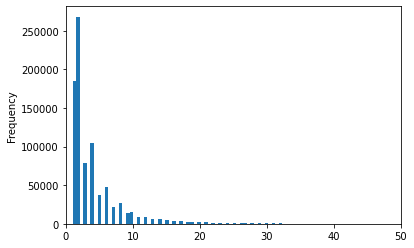

In [ ]:
customer_order['purchases'].plot.hist(bins=10000, xlim=(0,50))

**Zoom del mismo gráfico**

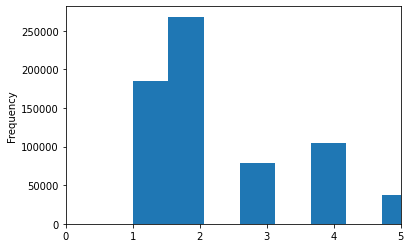

In [ ]:
customer_order['purchases'].plot.hist(bins=10000, xlim=(0,5))

**Filtramos los clientes para que queden los que tengan más de una compra, quedan 677896 clientes**


In [ ]:
customer_purchases = customer_order.set_index(['customer'])['purchases']


In [ ]:
print("Cantidad de clientes con una sola compra: {}".format(len(customer_purchases.loc[customer_purchases == 1])))

Cantidad de clientes con una sola compra: 184649


In [ ]:
customer_order_multiple = customer_purchases.loc[customer_purchases > 1]
customer_order_multiple

customer
54055631     84
54055632     32
54055633     30
54055634     48
54055639      4
             ..
106216390     2
106216398     3
106216399     2
106216448     5
106216474     5
Name: purchases, Length: 677896, dtype: int64

In [ ]:
print('Clientes Totales:', customer_order.shape[0])
print('Clientes recurrentes:', customer_order_multiple.shape[0], str(round(customer_order_multiple.shape[0] / customer_order.shape[0] * 100,2)) + '%', '\n')
print('Compras Totales:', purchased_items.shape[0])

print('Compras recurrentes:', customer_order_multiple.sum(), str(round((customer_order_multiple.sum() / customer_order['purchases'].sum()) * 100,2) ) + '%')


Clientes Totales: 862545
Clientes recurrentes: 677896 78.59% 

Compras Totales: 3696696
Compras recurrentes: 3512047 95.01%
